In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split

In [2]:
lin = load_linnerud()

In [3]:
lin

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.DataFrame(lin.data, columns = lin.feature_names)

In [5]:
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [6]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [7]:
df.shape

(20, 3)

In [8]:
df[['Weight', 'Waist', 'Pulse']] = lin.target
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [9]:
df.isna().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

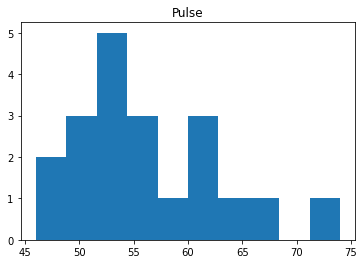

In [10]:
df.describe()
plt.hist(df['Pulse'])
plt.title('Pulse')
plt.show()

In [11]:
df_1 = df[['Chins', 'Situps', 'Jumps','Pulse']]
df_1.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0


In [12]:
X=df[['Chins', 'Situps', 'Jumps']]

In [13]:
Y=df['Pulse']

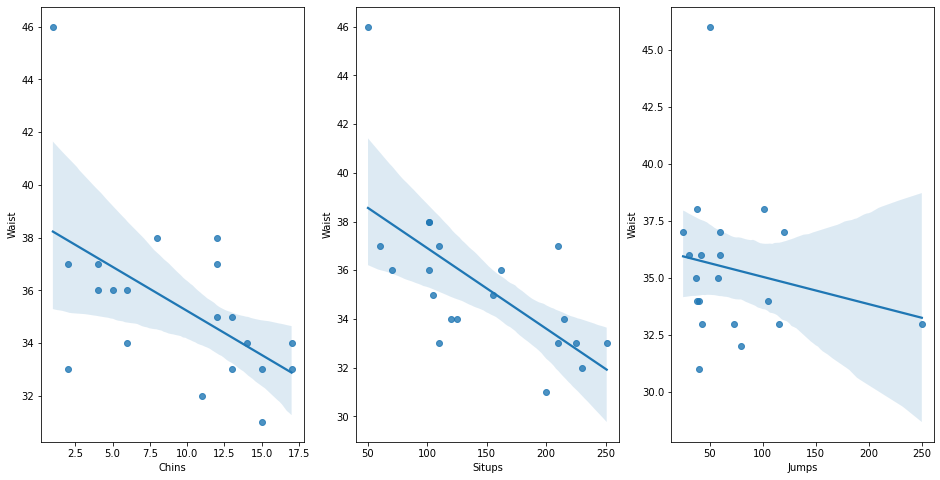

In [14]:
fig, axs = plt.subplots(figsize=(16,8), ncols=3)

lm_features = ['Chins', 'Situps', 'Jumps']

for i, feature in enumerate(lm_features):
    sns.regplot(x=feature, y='Waist', data=df, ax=axs[i])

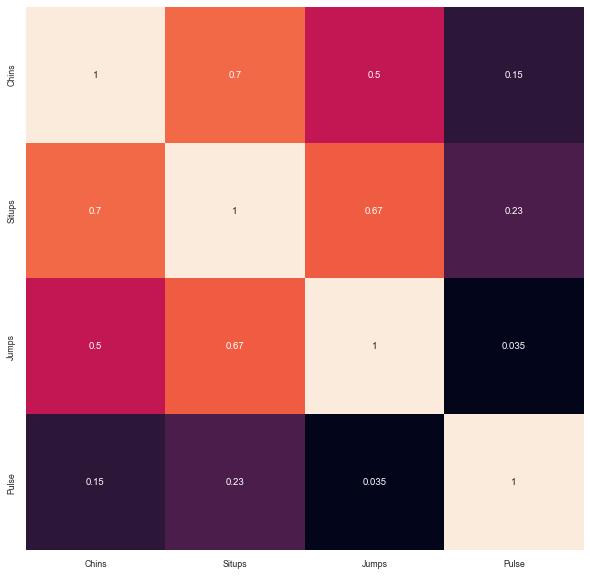

In [15]:
df_corr=df_1.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [17]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (3,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [19]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 887ms/step - loss: 54.7036 - mae: 54.7036 - val_loss: 52.1418 - val_mae: 52.1418
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 51.1119 - mae: 51.1119 - val_loss: 49.1593 - val_mae: 49.1593
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 48.7898 - mae: 48.7898 - val_loss: 46.6012 - val_mae: 46.6012
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 46.7681 - mae: 46.7681 - val_loss: 44.5480 - val_mae: 44.5480
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 45.1471 - mae: 45.1471 - val_loss: 42.5644 - val_mae: 42.5644
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 43.5692 - mae: 43.5692 - val_loss: 40.5525 - val_mae: 40.5525
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 41.9785 - mae: 41.9785 - val_loss: 38.5263 - val_mae: 38.5263
Epoch 8/100
1/1 [==============================] - 0s 35ms/st

Epoch 62/100
1/1 [==============================] - 0s 32ms/step - loss: 20.7189 - mae: 20.7189 - val_loss: 10.6428 - val_mae: 10.6428
Epoch 63/100
1/1 [==============================] - 0s 30ms/step - loss: 20.8137 - mae: 20.8137 - val_loss: 9.9659 - val_mae: 9.9659
Epoch 64/100
1/1 [==============================] - 0s 28ms/step - loss: 20.6696 - mae: 20.6696 - val_loss: 10.7352 - val_mae: 10.7352
Epoch 65/100
1/1 [==============================] - 0s 29ms/step - loss: 20.5765 - mae: 20.5765 - val_loss: 10.6994 - val_mae: 10.6994
Epoch 66/100
1/1 [==============================] - 0s 33ms/step - loss: 20.6926 - mae: 20.6926 - val_loss: 10.0672 - val_mae: 10.0672
Epoch 67/100
1/1 [==============================] - 0s 33ms/step - loss: 20.5578 - mae: 20.5578 - val_loss: 10.4458 - val_mae: 10.4458
Epoch 68/100
1/1 [==============================] - 0s 34ms/step - loss: 20.4333 - mae: 20.4333 - val_loss: 11.2587 - val_mae: 11.2587
Epoch 69/100
1/1 [==============================] - 0s 33

In [20]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 10.6976 - mae: 10.6976


[10.697638511657715, 10.697638511657715]

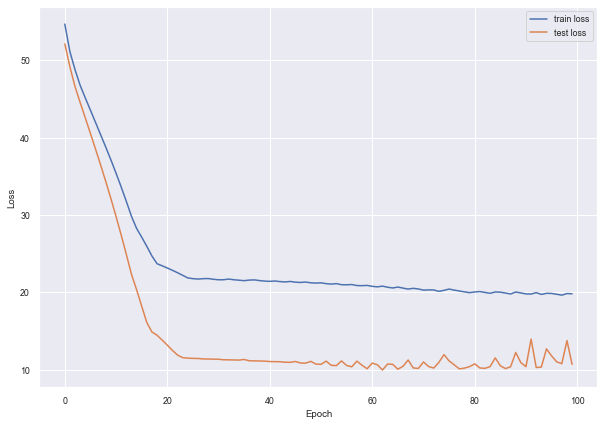

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

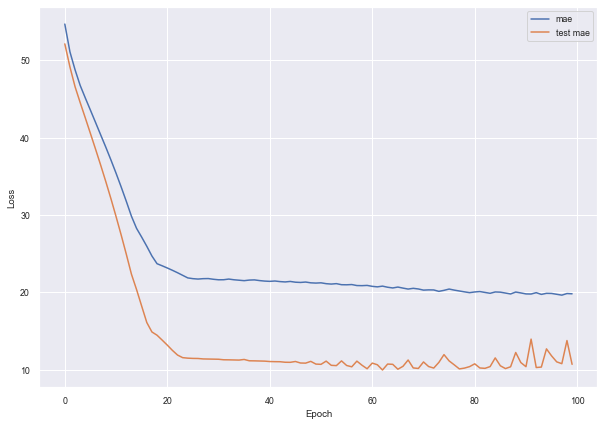

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()